# WeatherPy - Analysis of Weather Data

----

Here we are creating a Python Script to
  - Randomly select longitude and latitude and use Citipy library and get 500 + unique cities
  - Using Openweathermap API to get the weather conditions for these 500+ cities.
  - Using this data Analyse and plot how the following parameters vary with latitude :
              i)  Max temperature
              ii) Cloudiness 
             iii) Wind 
              iv) Humidity
             


### Observation :
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.

* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:/DataAnalytics/output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
plt.style.use('seaborn')
print(lat_range)


(-90, 90)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

city_dict=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_obj=citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = f"{city_obj.city_name},{(city_obj.country_code).upper()}"
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = f"{url}appid={api_key}&units={units}&q="
city_samples = [cities[x:x+50] for x in range(0, len(cities), 50)]

for i , item in enumerate(city_samples):
     
    for j,item in enumerate (city_samples[i]):
          query_url = base_url + item
          print(query_url)
          print(f"Processing record {j+1} of  Set {i+1} with city {item}")
          weather_response = requests.get(query_url)
          weather_json = weather_response.json()
          if weather_json["cod"] != "404": 
            city_dict.append({"City":weather_json["name"],"Lat":weather_json["coord"]["lat"],"Lng":weather_json["coord"]["lon"] ,
                       "Humidity": weather_json["main"]["humidity"],"Country":weather_json["sys"]["country"],
                      "Cloudiness":weather_json["clouds"]["all"],"Max Temp": weather_json["main"]["temp_max"],
                     "Wind speed": weather_json["wind"]["speed"],"Date": weather_json["dt"]})
          else:
            print(f"City not found.Skipping ....")
    
 #Introudce delay for 60 seconds between API calls for a set of 50
    #print("sleep")
    #time.sleep(60)

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=vicosa,BR
Processing record 1 of  Set 1 with city vicosa,BR
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=sao jose da coroa grande,BR
Processing record 2 of  Set 1 with city sao jose da coroa grande,BR
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=esperance,AU
Processing record 3 of  Set 1 with city esperance,AU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=port alfred,ZA
Processing record 4 of  Set 1 with city port alfred,ZA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=saleaula,WS
Processing record 5 of  Set 1 with city saleaula,WS
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial

City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=acapulco,MX
Processing record 49 of  Set 1 with city acapulco,MX
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=srednekolymsk,RU
Processing record 50 of  Set 1 with city srednekolymsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=ust-kulom,RU
Processing record 1 of  Set 2 with city ust-kulom,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=ola,RU
Processing record 2 of  Set 2 with city ola,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=nizhneyansk,RU
Processing record 3 of  Set 2 with city nizhneyansk,RU
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imper

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=kudat,MY
Processing record 47 of  Set 2 with city kudat,MY
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=vila franca do campo,PT
Processing record 48 of  Set 2 with city vila franca do campo,PT
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=irtyshskiy,RU
Processing record 49 of  Set 2 with city irtyshskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=upata,VE
Processing record 50 of  Set 2 with city upata,VE
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=dikson,RU
Processing record 1 of  Set 3 with city dikson,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=pincher creek,CA
Processing record 2 of  Set 3

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=constitucion,MX
Processing record 45 of  Set 3 with city constitucion,MX
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=capoterra,IT
Processing record 46 of  Set 3 with city capoterra,IT
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=falealupo,WS
Processing record 47 of  Set 3 with city falealupo,WS
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=sataua,WS
Processing record 48 of  Set 3 with city sataua,WS
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=cozumel,MX
Processing record 49 of  Set 3 with city cozumel,MX
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=cabedelo,BR
Processing record 42 of  Set 4 with city cabedelo,BR
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=taksimo,RU
Processing record 43 of  Set 4 with city taksimo,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=okha,RU
Processing record 44 of  Set 4 with city okha,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=dingle,IE
Processing record 45 of  Set 4 with city dingle,IE
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=bengkulu,ID
Processing record 46 of  Set 4 with city bengkulu,ID
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=mrirt,MA
Processing record 47 of  Set 4 wi

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=cervo,ES
Processing record 41 of  Set 5 with city cervo,ES
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=juifang,TW
Processing record 42 of  Set 5 with city juifang,TW
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=nizhyn,UA
Processing record 43 of  Set 5 with city nizhyn,UA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=san cristobal,EC
Processing record 44 of  Set 5 with city san cristobal,EC
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=kongolo,CD
Processing record 45 of  Set 5 with city kongolo,CD
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=banmo,MM
Processing record 46 of

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=otradnoye,RU
Processing record 39 of  Set 6 with city otradnoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=bulembu,SZ
Processing record 40 of  Set 6 with city bulembu,SZ
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=tunduru,TZ
Processing record 41 of  Set 6 with city tunduru,TZ
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=sorland,NO
Processing record 42 of  Set 6 with city sorland,NO
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=bokspits,BW
Processing record 43 of  Set 6 with city bokspits,BW
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=shi

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=lorengau,PG
Processing record 36 of  Set 7 with city lorengau,PG
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=dawson,US
Processing record 37 of  Set 7 with city dawson,US
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=anuradhapura,LK
Processing record 38 of  Set 7 with city anuradhapura,LK
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=oktyabrskiy,RU
Processing record 39 of  Set 7 with city oktyabrskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=trelleborg,SE
Processing record 40 of  Set 7 with city trelleborg,SE
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=wattegama,LK
Processing record 41 of  Set 7

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=namatanai,PG
Processing record 34 of  Set 8 with city namatanai,PG
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=verkhoyansk,RU
Processing record 35 of  Set 8 with city verkhoyansk,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=koumac,NC
Processing record 36 of  Set 8 with city koumac,NC
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=kimbe,PG
Processing record 37 of  Set 8 with city kimbe,PG
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=salta,AR
Processing record 38 of  Set 8 with city salta,AR
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=slantsy,RU
Processing record 39 of  Set 8 with city slantsy,RU
ht

City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=pevek,RU
Processing record 33 of  Set 9 with city pevek,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=mangan,IN
Processing record 34 of  Set 9 with city mangan,IN
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=burnie,AU
Processing record 35 of  Set 9 with city burnie,AU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=la ronge,CA
Processing record 36 of  Set 9 with city la ronge,CA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=nefteyugansk,RU
Processing record 37 of  Set 9 with city nefteyugansk,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=kondagaon,IN
Processing record 38 

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=jiazi,CN
Processing record 32 of  Set 10 with city jiazi,CN
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=morant bay,JM
Processing record 33 of  Set 10 with city morant bay,JM
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=mount gambier,AU
Processing record 34 of  Set 10 with city mount gambier,AU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=goianesia,BR
Processing record 35 of  Set 10 with city goianesia,BR
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=tezu,IN
Processing record 36 of  Set 10 with city tezu,IN
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=luanda,AO
Processing record 37 of  Set 10 with cit

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=port-gentil,GA
Processing record 30 of  Set 11 with city port-gentil,GA
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=coihaique,CL
Processing record 31 of  Set 11 with city coihaique,CL
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=ruidoso,US
Processing record 32 of  Set 11 with city ruidoso,US
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=khonuu,RU
Processing record 33 of  Set 11 with city khonuu,RU
City not found.Skipping ....
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=manggar,ID
Processing record 34 of  Set 11 with city manggar,ID
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=stanghelle,NO
Processin

http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=horasan,TR
Processing record 29 of  Set 12 with city horasan,TR
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=pustoshka,RU
Processing record 30 of  Set 12 with city pustoshka,RU
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=mandalgovi,MN
Processing record 31 of  Set 12 with city mandalgovi,MN
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=pleasanton,US
Processing record 32 of  Set 12 with city pleasanton,US
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=rapid valley,US
Processing record 33 of  Set 12 with city rapid valley,US
http://api.openweathermap.org/data/2.5/weather?appid=168e2ba4729916e2f0930e94ca92d07c&units=imperial&q=bonavista,CA
Processing record 34 of

In [6]:


Weather_data=pd.DataFrame(city_dict)
Weather_data["Formated Date"] =Weather_data["Date"].apply(lambda x : datetime.datetime.utcfromtimestamp(x).strftime('%m/%d/%y'))
Weather_data.to_csv(output_data_file, index=False)
Weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed,Formated Date
0,Vicosa,32,BR,1547257173,88,-20.75,-42.88,67.75,2.71,01/12/19
1,Sao Jose da Coroa Grande,68,BR,1547257174,94,-8.90,-35.15,75.89,5.61,01/12/19
2,Esperance,0,AU,1547254800,33,-33.86,121.89,77.00,11.41,01/12/19
3,Port Alfred,0,ZA,1547256867,83,-33.59,26.89,66.89,22.50,01/12/19
4,Saskylakh,36,RU,1547256883,0,71.97,114.09,-43.18,3.60,01/12/19


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

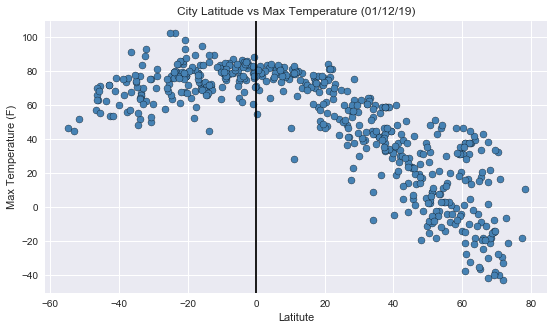

In [8]:
fig,ax = plt.subplots(figsize=(9,5))
ax.scatter(Weather_data["Lat"],Weather_data["Max Temp"],color='steelblue',marker='o',edgecolor='black')
#ax.grid()
ax.axvline(x=0,color='black')
plt.title("City Latitude vs Max Temperature (" + str(Weather_data["Formated Date"].max())+")")
plt.xlabel("Latitute")
plt.ylabel("Max Temperature (F)")
plt.show()


#### Latitude vs. Humidity Plot

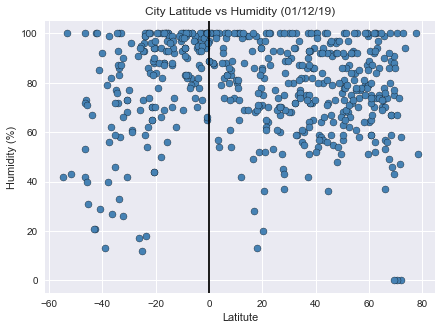

In [11]:
fig,ax = plt.subplots(figsize=(7,5))
ax.scatter(Weather_data["Lat"],Weather_data["Humidity"],color='steelblue',marker='o',edgecolor='black')
#ax.grid()
ax.axvline(x=0,color='black')
plt.title("City Latitude vs Humidity (" + str(Weather_data["Formated Date"].max())+")")
plt.xlabel("Latitute")
plt.ylabel("Humidity (%)")
plt.show()

#### Latitude vs. Cloudiness Plot

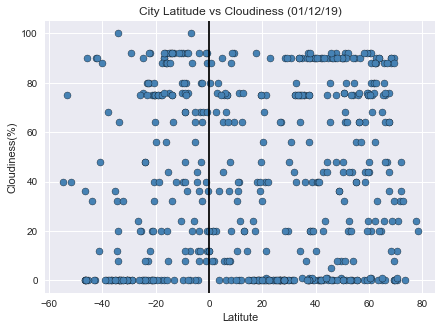

In [13]:
fig,ax = plt.subplots(figsize=(7,5))
ax.scatter(Weather_data["Lat"],Weather_data["Cloudiness"],color='steelblue',marker='o',edgecolor='black')
#ax.grid()
ax.axvline(x=0,color='black')
plt.title("City Latitude vs Cloudiness (" + str(Weather_data["Formated Date"].max())+")")
plt.xlabel("Latitute")
plt.ylabel("Cloudiness(%)")
plt.show()

#### Latitude vs. Wind Speed Plot

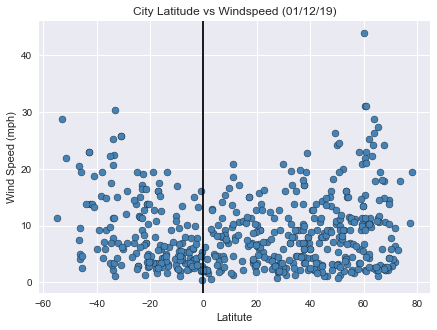

In [12]:
fig,ax = plt.subplots(figsize=(7,5))
ax.scatter(Weather_data["Lat"],Weather_data["Wind speed"],color='steelblue',marker='o',edgecolor='black')
#ax.grid()
ax.axvline(x=0,color='black')
plt.title("City Latitude vs Windspeed (" + str(Weather_data["Formated Date"].max())+")")
plt.xlabel("Latitute")
plt.ylabel("Wind Speed (mph)")
plt.show()